### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
df = pd.read_csv('data/coupons.csv')
pd.set_option('display.max_columns', None)

In [4]:
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
missing_values = df.isna().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


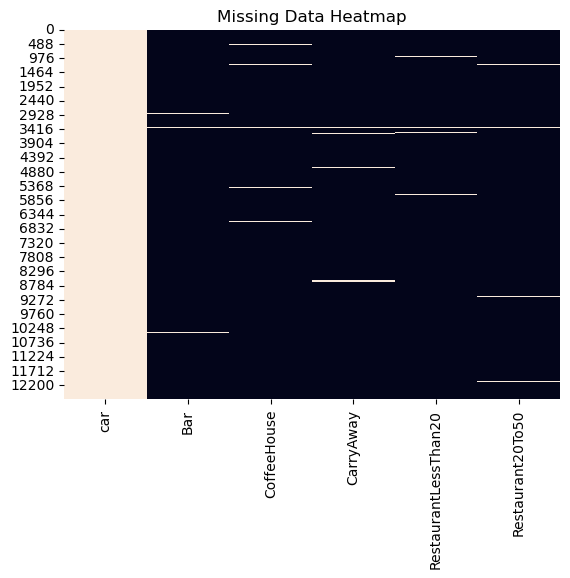

In [6]:
cols_with_nulls = df.columns[df.isnull().any()].tolist()
df_with_nulls = df[cols_with_nulls]
sns.heatmap(df_with_nulls.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
missing_percentage = df['car'].isnull().mean() * 100
print(f"Percentage of missing values in the 'car' column: {missing_percentage}%")

Percentage of missing values in the 'car' column: 99.14853358561967%


In [8]:
data_types = df.dtypes
print(data_types)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [9]:
summary_stats = df.describe()
print(summary_stats)

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [10]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 74


In [11]:
print(df['car'].value_counts())

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


In [12]:
print(df['Bar'].value_counts())

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


In [13]:
print(df['CoffeeHouse'].value_counts())

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


In [14]:
print(df['CarryAway'].value_counts())

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


In [15]:
print(df['age'].value_counts())

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


In [16]:
# Convert age to a numeric datatype
# Mapping dictionary
age_mapping = {
    '50plus': 50,
    'below21': 18  # Assuming this is for ages below 21, so choosing an approximate midpoint
}

# Replace the values in the DataFrame
df['age'] = df['age'].replace(age_mapping)

# Now convert the column to numeric type
df['age'] = pd.to_numeric(df['age'])

In [17]:
print(df['income'].value_counts())

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64


In [18]:
print(df['occupation'].value_counts())

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [19]:
df['expiration'].value_counts()

expiration
1d    7091
2h    5593
Name: count, dtype: int64

In [20]:
zero_variance = df.loc[:, df.nunique() == 1]
print(f"Columns with zero variance: {zero_variance.columns.tolist()}")

Columns with zero variance: ['toCoupon_GEQ5min']


In [21]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column {col} distribution:")
    print(df[col].value_counts(dropna=False))
    print("\n")

Column destination distribution:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


Column passanger distribution:
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


Column weather distribution:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


Column time distribution:
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


Column coupon distribution:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


Column expiration distribution:
expiration
1d    7091
2h    5593
Name: count, dtype: int64


Column gender distribution:
gender
Female    6511
Male      6173
Name: count, dtype: int64


Column maritalStatus distribution:
maritalStatus
Married partner      5100
Single

3. Decide what to do about your missing data -- drop, replace, other...

In [22]:
# Drop "car" since it is almost entirely empty and seems to have little value
df.drop('car', axis=1, inplace=True)

# replace missing data with the most common values
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)

In [23]:
# check if there are any more null values in any of the columns
df.isnull().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
Bar                     False
CoffeeHouse             False
CarryAway               False
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

4. What proportion of the total observations chose to accept the coupon? 



In [24]:
(df['Y'] == 1).mean()

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

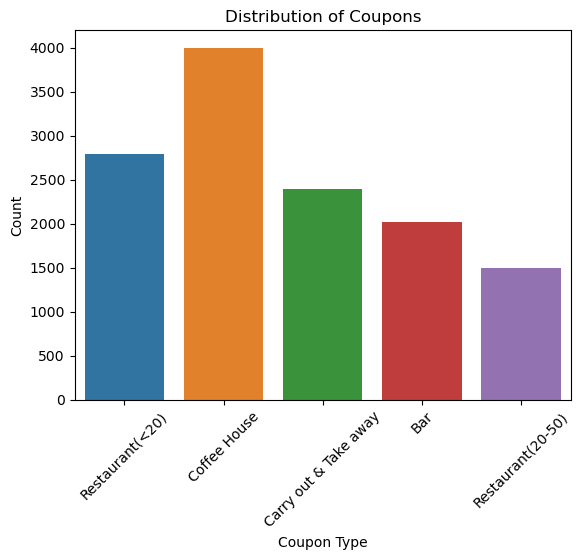

In [25]:
sns.countplot(data=df, x='coupon')
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

6. Use a histogram to visualize the temperature column.

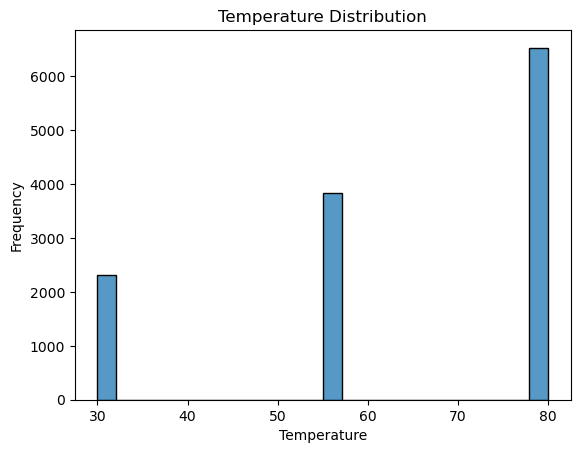

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.histplot(data=df, x='temperature', kde=False)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [27]:
bar_df = df[df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [28]:
(bar_df["Y"] == 1).mean()

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [30]:
# Categorize the bar visits
def categorize_bar_visits(bar):
    if bar in ['never', 'less1', '1~3']:
        return '3 or fewer times'
    return 'more than 3 times'
    
bar_df.loc[:, 'bar_visit_category'] = bar_df['Bar'].apply(categorize_bar_visits)

acceptance_rates = bar_df.groupby('bar_visit_category')['Y'].mean()

# Print the results
print("Acceptance rates by bar visit frequency:")
print(acceptance_rates)

Acceptance rates by bar visit frequency:
bar_visit_category
3 or fewer times     0.370737
more than 3 times    0.768844
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [32]:
bar_df.loc[:, 'over_25_bar_patrons'] = (bar_df['Bar'].isin(['1~3', '4~8', 'gt8']) & (bar_df['age'] >= 25)).map({True: 'Over 25 bar patrons', False: 'Others'})

acceptance_rates = bar_df.groupby('over_25_bar_patrons')['Y'].mean()

print("Acceptance rates for over 25 bar patrons:")
print(acceptance_rates)

Acceptance rates for over 25 bar patrons:
over_25_bar_patrons
Others                 0.335003
Over 25 bar patrons    0.695238
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [34]:
bar_df.loc[:, 'bar_question_5'] = ((bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                      (bar_df['passanger'] != 'Kid(s)') & 
                      (bar_df['occupation'] != 'Farming Fishing & Forestry')
                     ).map({True: 'Bar patrons without kid passenger not farmer/fisher/forester', False: 'Others'})

acceptance_rates = bar_df.groupby('bar_question_5')['Y'].mean()

print("Acceptance rates for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:")
print(acceptance_rates)

Acceptance rates for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:
bar_question_5
Bar patrons without kid passenger not farmer/fisher/forester    0.713249
Others                                                          0.296044
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance Rates
                                Condition  Acceptance Rate
0      Bar >1/month, No Kids, Not Widowed         0.713249
1                 Bar >1/month, <30 Years         0.721739
2  Cheap Restaurant >4/month, <50K Income         0.453488
3                                combined         0.588918


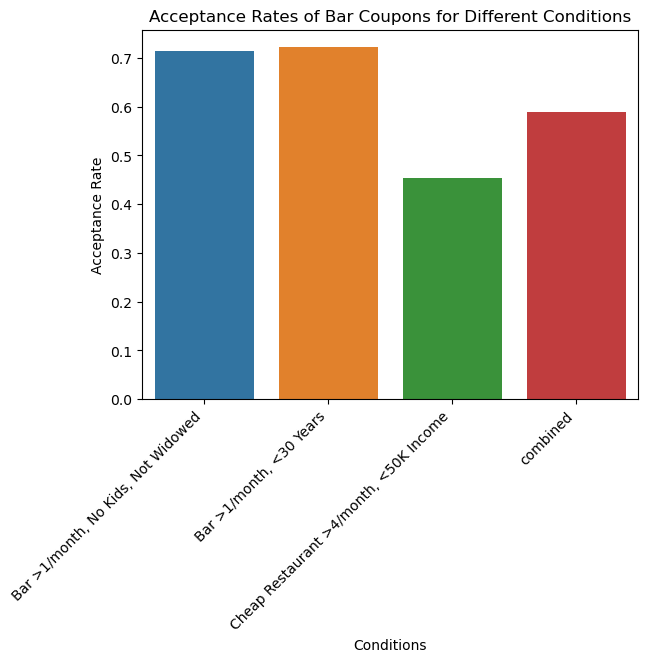

In [35]:
condition_1 = (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['passanger'] != 'Kid(s)') & (bar_df['maritalStatus'] != 'Widowed')
condition_2 = (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'] < 30)
condition_3 = (bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_df['income'].isin(['$25000 - $37499', '$12500 - $24999','$37500 - $49999', 'Less than $12500']))

acceptance_rate1 = bar_df[condition_1]['Y'].mean()
acceptance_rate2 = bar_df[condition_2]['Y'].mean()
acceptance_rate3 = bar_df[condition_3]['Y'].mean()
acceptance_rate_combined = bar_df[condition_1 | condition_2 | condition_3]['Y'].mean()

acceptance_data = pd.DataFrame({
    'Condition': ['Bar >1/month, No Kids, Not Widowed', 'Bar >1/month, <30 Years', 'Cheap Restaurant >4/month, <50K Income', 'combined'],
    'Acceptance Rate': [acceptance_rate1, acceptance_rate2, acceptance_rate3, acceptance_rate_combined]
})

print("Acceptance Rates")
print(acceptance_data)

bar_plot = sns.barplot(x='Condition', y='Acceptance Rate', data=acceptance_data)
plt.title('Acceptance Rates of Bar Coupons for Different Conditions')
plt.ylabel('Acceptance Rate')
plt.xlabel('Conditions')
plt.xticks(rotation=45, ha='right')

plt.savefig('images/bar_coupon_3_conditions.png')

plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the analysis, drivers who accepted the bar coupon tended to be people who are older with higher incomes.  They are people with more disposable income and who already go to bars often.  Absense of kids in the car is also a strong indicator, along with white collar or urban jobs.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [36]:
coffee_df = df[df['coupon'] == 'Coffee House']

In [37]:
coffee_df.shape[0]

3996

In [38]:
(coffee_df["Y"] == 1).mean()

0.49924924924924924

In [39]:
features = ['CoffeeHouse', 'time', 'weather', 'age', 'income', 'passanger', 'maritalStatus', 'gender']
for feature in features:
    print(f"Acceptance rate by {feature}:")
    print(coffee_df.groupby(feature)['Y'].mean())
    print("\n")

Acceptance rate by CoffeeHouse:
CoffeeHouse
1~3      0.647793
4~8      0.685874
gt8      0.657895
less1    0.480384
never    0.188781
Name: Y, dtype: float64


Acceptance rate by time:
time
10AM    0.640712
10PM    0.424242
2PM     0.547859
6PM     0.412626
7AM     0.445783
Name: Y, dtype: float64


Acceptance rate by weather:
weather
Rainy    0.522124
Snowy    0.432343
Sunny    0.503605
Name: Y, dtype: float64


Acceptance rate by age:
age
18    0.696774
21    0.524349
26    0.514828
31    0.476726
36    0.467662
41    0.501538
46    0.513636
50    0.420183
Name: Y, dtype: float64


Acceptance rate by income:
income
$100000 or More     0.494382
$12500 - $24999     0.540404
$25000 - $37499     0.473438
$37500 - $49999     0.542373
$50000 - $62499     0.503650
$62500 - $74999     0.436364
$75000 - $87499     0.296610
$87500 - $99999     0.557196
Less than $12500    0.551948
Name: Y, dtype: float64


Acceptance rate by passanger:
passanger
Alone        0.437943
Friend(s)    0.596906
Kid(

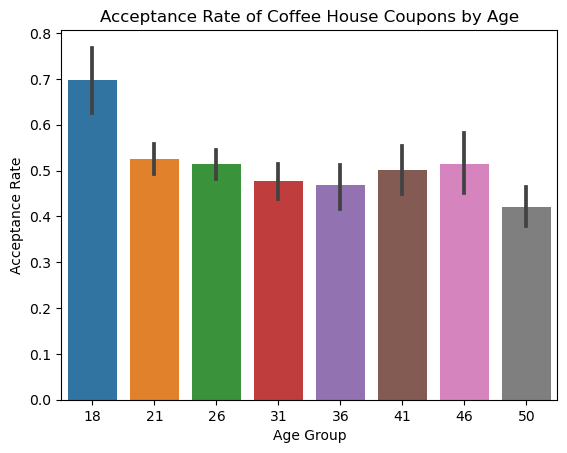

In [40]:
sns.barplot(x='age', y='Y', data=coffee_df)
plt.title('Acceptance Rate of Coffee House Coupons by Age')
plt.ylabel('Acceptance Rate')
plt.xlabel('Age Group')
plt.show()

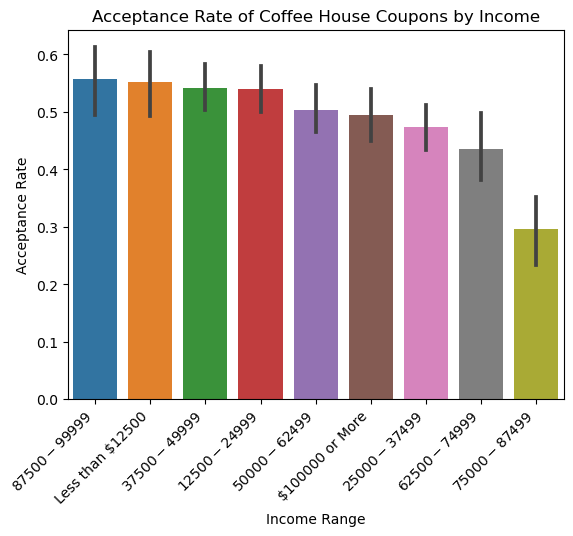

In [41]:
order = coffee_df.groupby('income')['Y'].mean().sort_values(ascending=False).index
sns.barplot(x='income', y='Y', data=coffee_df, order=order)
plt.title('Acceptance Rate of Coffee House Coupons by Income')
plt.ylabel('Acceptance Rate')
plt.xlabel('Income Range')
plt.xticks(rotation=45, ha='right')
plt.show()

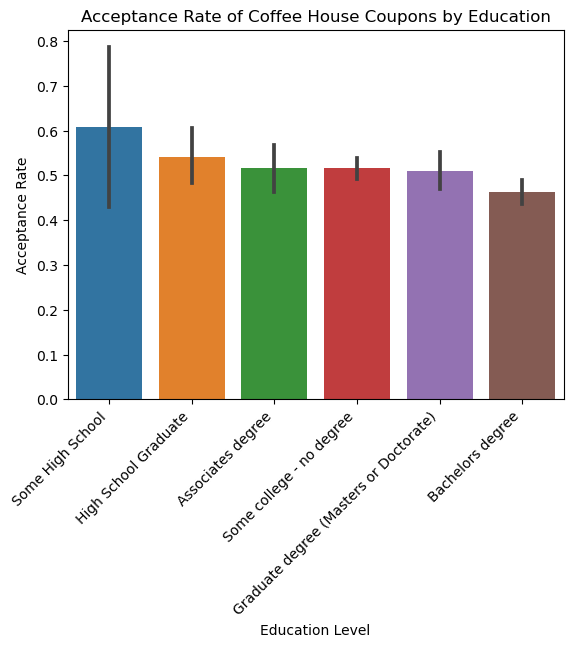

In [42]:
order = coffee_df.groupby('education')['Y'].mean().sort_values(ascending=False).index
sns.barplot(x='education', y='Y', data=coffee_df, order=order)
plt.title('Acceptance Rate of Coffee House Coupons by Education')
plt.ylabel('Acceptance Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.show()

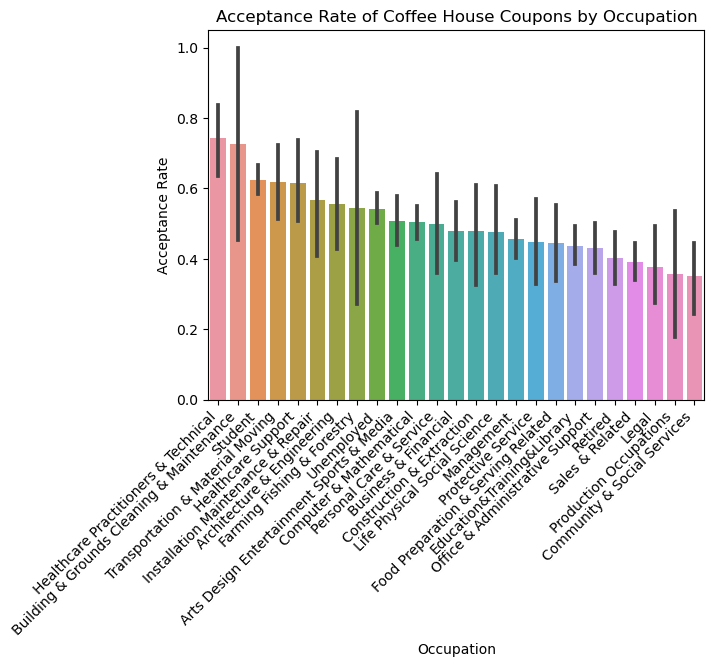

In [43]:
order = coffee_df.groupby('occupation')['Y'].mean().sort_values(ascending=False).index
sns.barplot(x='occupation', y='Y', data=coffee_df, order=order)
plt.title('Acceptance Rate of Coffee House Coupons by Occupation')
plt.ylabel('Acceptance Rate')
plt.xlabel('Occupation')
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
coffee_df.loc[:, 'under_30_coffee_patrons'] = (coffee_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']) & (coffee_df['age'] < 30)).map({True: 'Under 30 coffee patrons', False: 'Others'})
acceptance_rates = coffee_df.groupby('under_30_coffee_patrons')['Y'].mean()

print("Acceptance rates for under 30 coffee house patrons:")
print(acceptance_rates)

Acceptance rates for under 30 coffee house patrons:
under_30_coffee_patrons
Others                     0.437064
Under 30 coffee patrons    0.689340
Name: Y, dtype: float64


In [48]:
coffee_df.loc[:, 'morning_1d_exp'] = (coffee_df['time'].isin(['10AM', '7AM']) & (coffee_df['expiration'] == '1d')).map({True: 'Morning 1d expiration', False: 'Others'})
acceptance_rates = coffee_df.groupby('morning_1d_exp')['Y'].mean()

print("Acceptance rates for morning coupons:")
print(acceptance_rates)

Acceptance rates for morning coupons:
morning_1d_exp
Morning 1d expiration    0.631259
Others                   0.473180
Name: Y, dtype: float64


In [49]:
coffee_df.loc[:, 'morning_2h_exp'] = (coffee_df['time'].isin(['10AM', '7AM']) & (coffee_df['expiration'] == '2h')).map({True: 'Morning 2h expiration', False: 'Others'})
acceptance_rates = coffee_df.groupby('morning_2h_exp')['Y'].mean()

print("Acceptance rates for morning coupons:")
print(acceptance_rates)

Acceptance rates for morning coupons:
morning_2h_exp
Morning 2h expiration    0.491761
Others                   0.502286
Name: Y, dtype: float64


Similar to how regular bar patrons tended to accept the bar coupon, regular coffee house patrons were also likely to accept the coffee house coupon.  However, compared to the bar coupon, the coffee house coupons tended to accepted more by younger drivers.  Another interesting data point was the coupons were more likely to be accepted in the morning when people are more likely to go to a coffee shop, though oddly they were more likely to be accepted if they were 1 day coupons instead of 2 hour coupons.